In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import time


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karakaggle/kaggle-cat-vs-dog-dataset")

print("Path to dataset files:", path)

100%|██████████| 787M/787M [00:35<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/karakaggle/kaggle-cat-vs-dog-dataset/versions/1


In [7]:
import os
os.chdir("/root/.cache/kagglehub/datasets/karakaggle/kaggle-cat-vs-dog-dataset/versions/1")

In [8]:
os.listdir()

['kagglecatsanddogs_3367a']

In [9]:
os.chdir('kagglecatsanddogs_3367a')

In [10]:
os.listdir()

['readme[1].txt', 'MSR-LA - 3467.docx', 'PetImages']

In [11]:
os.chdir('PetImages')

In [12]:
os.getcwd()

'/root/.cache/kagglehub/datasets/karakaggle/kaggle-cat-vs-dog-dataset/versions/1/kagglecatsanddogs_3367a/PetImages'

In [13]:
originaldata="/root/.cache/kagglehub/datasets/karakaggle/kaggle-cat-vs-dog-dataset/versions/1/kagglecatsanddogs_3367a/PetImages"

In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

In [15]:
# Path to your dataset
data_dir = originaldata

In [16]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [17]:
dataset_path="/root/.cache/kagglehub/datasets/karakaggle/kaggle-cat-vs-dog-dataset/versions/1/kagglecatsanddogs_3367a/PetImages"

In [18]:
# Load dataset
dataset = datasets.ImageFolder(data_dir, transform=transform)

In [19]:
# Split dataset into train (80%) and val (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [20]:
# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

In [21]:
# Simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 18 * 18, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = SimpleCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Using device: cuda


In [22]:
# Training loop
def train(model, loader):
    model.train()
    running_loss = 0
    running_corrects = 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).float()
        running_corrects += torch.sum(preds == labels)
    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_corrects.double() / len(loader.dataset)
    return epoch_loss, epoch_acc.item()

In [23]:
def validate(model, loader):
    model.eval()
    running_loss = 0
    running_corrects = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            running_corrects += torch.sum(preds == labels)
    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = running_corrects.double() / len(loader.dataset)
    return epoch_loss, epoch_acc.item()

In [33]:
train_losses, train_accs = [], []
val_losses, val_accs = [], []

In [30]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 1/5 | Train Loss: 0.6932 Acc: 0.5021 | Val Loss: 0.6931 Acc: 0.5032


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 2/5 | Train Loss: 0.6931 Acc: 0.5036 | Val Loss: 0.6931 Acc: 0.5032


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 3/5 | Train Loss: 0.6932 Acc: 0.4961 | Val Loss: 0.6932 Acc: 0.4968


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 4/5 | Train Loss: 0.6932 Acc: 0.4962 | Val Loss: 0.6932 Acc: 0.4968


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch 5/5 | Train Loss: 0.6932 Acc: 0.5019 | Val Loss: 0.6932 Acc: 0.4968


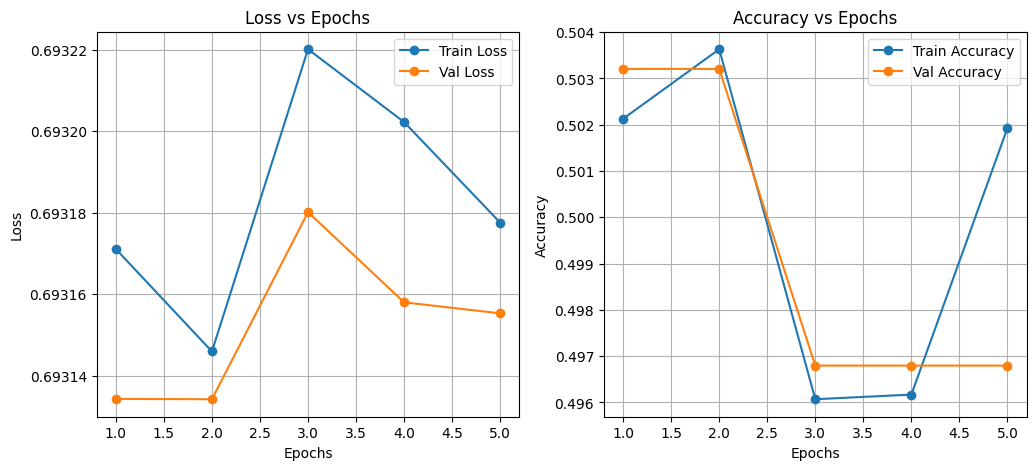


--- Prediction Summary on Validation Set ---
Predicted Cats: 0
Predicted Dogs: 4992


In [34]:
num_epochs = 5   # Adjust epochs if needed
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader)
    val_loss, val_acc = validate(model, val_loader)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")


plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(range(1,num_epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1,num_epochs+1), val_losses, label='Val Loss', marker='o')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(range(1,num_epochs+1), train_accs, label='Train Accuracy', marker='o')
plt.plot(range(1,num_epochs+1), val_accs, label='Val Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

def count_predictions(model, loader):
    model.eval()
    cat_count, dog_count = 0, 0
    with torch.no_grad():
        for inputs, _ in loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            preds = (outputs > 0.5).float().cpu().numpy()
            cat_count += (preds == 0).sum()
            dog_count += (preds == 1).sum()
    return cat_count, dog_count

cat_count, dog_count = count_predictions(model, val_loader)
print("\n--- Prediction Summary on Validation Set ---")
print(f"Predicted Cats: {cat_count}")
print(f"Predicted Dogs: {dog_count}")
